In [1]:
import geopandas as gp
import pandas as pd
from  matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from model import *
import numpy as np
from scipy.optimize import curve_fit
from model.geoplot import *
from matplotlib.patches import ConnectionPatch, ArrowStyle

In [11]:
variables = ["gdp_capita", "permeability", "offset"]
variables_to_labels = {
    "gdp_capita" : "PIB per cápita",
    "ppp_per_capita" : "PPP per cápita",
    "permeability" : r"$\phi$",
    "offset" : r"$\tau$",
    "1/permeability" : r"Permeabilidad$^-1$",
    "initial_i" : r"$\rho_I (t=0)$",
    "what" : r"$\xi$",
}
variables_to_units = {
    "gdp_capita" : r"(1k\$/año)",
    "ppp_per_capita" : "(int$)",
    "permeability" : "(\%)",
    "offset" : "(días)",
    "1/permeability" : r"(%$^-1$)",
    "initial_i" : "(\%)",
    "what" : r"(días$^{-1}$)",
}
def get_labels(v):
    return list(map(lambda x: variables_to_labels[x], variables))

In [3]:
world = read_geo_frame()
world = update_geo_frame(world)
all_countries = get_all_countries()
world_only_used = world[list(w in all_countries for w in world.get("name"))].copy()
# save_geo_frame(world)

Canada
United States of America
Indonesia
Argentina
Chile
Russian Federation
South Africa
Mexico
Bolivia (Plurinational State of
Colombia
Panama
Honduras
Guatemala
France
Nigeria
Israel
Kuwait
Iraq
Bangladesh
Pakistan
Ukraine
Poland
Austria
Hungary
Romania
Germany
Bulgaria
Greece
Turkey
Switzerland
Luxembourg
Belgium
Portugal
Spain
Ireland
Italy
United Kingdom of Great Britain
Philippines
Malaysia
Saudi Arabia
Morocco
Egypt


In [4]:
# variables = ["gdp_capita", "permeability", "offset"]
# w_p = world[variables]

# lims = {
#     "gdp_capita": {"xmin":0, "ymin":0, "xmax":150e3, "ymax":150e3},
#     "permeability": {"xmin":0, "ymin":0, "xmax":1, "ymax":1},
#     "offset" : {"xmin":0, "ymin":0}
#     }

# g = seaborn.pairplot(w_p, corner=True, size=4)#,diag_kind='kde')
# for i,v_1 in enumerate(variables):
#     for j, v_2 in enumerate(variables):
#         if i>j :
#             continue
#         try:
#             g.axes[i,j].set_xlim(xmin=lims[v_2].get("xmin", None), xmax=lims[v_2].get("xmax", None))
#             g.axes[i,j].set_ylim(ymin=lims[v_1].get("ymin", None), ymax=lims[v_2].get("ymax", None))
#         except AttributeError as e:
#             continue
    

# g.map_lower(seaborn.kdeplot, levels=3, color=".2")


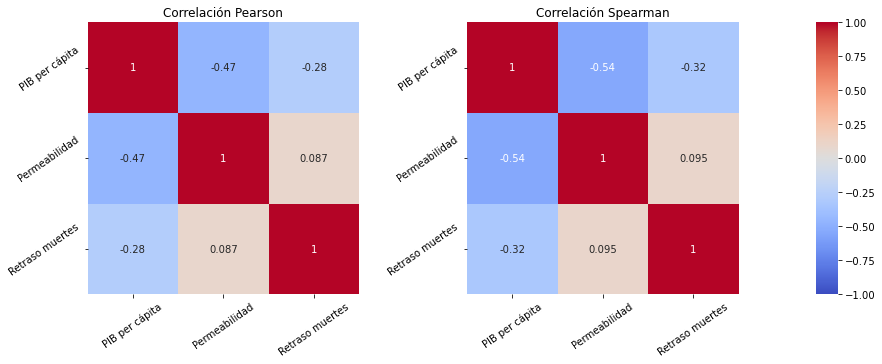

In [4]:
variables = ["gdp_capita", "permeability", "offset"]

labels = get_labels(variables)

w_p = world[["gdp_capita", "permeability", "offset"]]
# w_p["1/permeability"] = 1/w_p["permeability"]

corr_p = w_p.corr('pearson') 
corr_s = w_p.corr('spearman')
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,5), gridspec_kw={'width_ratios': [15,15, 1]})

p = seaborn.heatmap(corr_p, cmap="coolwarm", vmin=-1, vmax=1, annot=True, ax=ax1, square=True, cbar=False)
ax1.set_xticks(np.arange(corr_p.select_dtypes(['number']).shape[1])+0.5, labels, fontsize=10, rotation=35)
ax1.set_yticks(np.arange(corr_p.select_dtypes(['number']).shape[1])+0.5, labels, fontsize=10, rotation=35)

ax1.set_title("Correlación Pearson")

s = seaborn.heatmap(corr_s, cmap="coolwarm", vmin=-1, vmax=1, annot=True, ax=ax2, square=True, cbar_ax=ax_cb)
ax2.set_xticks(np.arange(corr_s.select_dtypes(['number']).shape[1])+0.5, labels, fontsize=10, rotation=35)
ax2.set_yticks(np.arange(corr_s.select_dtypes(['number']).shape[1])+0.5, labels, fontsize=10, rotation=35)

ax2.set_title("Correlación Spearman")

fig.savefig("images/coeficientes.png", dpi=400)

              gdp_capita  permeability    offset
gdp_capita      1.000000     -0.539908 -0.323265
permeability   -0.539908      1.000000  0.094763
offset         -0.323265      0.094763  1.000000


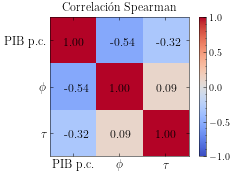

In [36]:
variables = ["gdp_capita", "permeability", "offset"]

labels = get_labels(variables)
labels[0] = "PIB p.c."

w_p = world[["gdp_capita", "permeability", "offset"]]
# w_p["1/permeability"] = 1/w_p["permeability"]

# corr_p = w_p.corr('pearson') 
corr_s = w_p.corr('spearman')
print(corr_s)

with plt.style.context('science'):
    fig, ax = plt.subplots(tight_layout=True)
    plt.minorticks_off()
    ax.set_title("Correlación Pearson")


    # s = seaborn.heatmap(corr_s, cmap="coolwarm", vmin=-1, vmax=1, annot=True, ax=ax, square=True, cbar_ax=ax_cb)
    
    number = corr_s.select_dtypes(['number']).shape[1]


    s = ax.imshow(corr_s, cmap="coolwarm", norm=Normalize(-1, 1), extent=(0, number, 0, number))
    ax.set_xticks(np.arange(number)+0.5, labels, fontsize=12, rotation=0, minor=False)
    ax.set_yticks(np.arange(number)+0.5, labels[::-1], fontsize=12, rotation=0, minor=False)

    
    for i in range(number):
        for j in range(number):
            ax.text(i+0.3, number-j+0.4-1, f"{corr_s.loc[variables[i],variables[j]]:.2f}", fontsize=12)

    plt.colorbar(s, ax=ax)
    ax.set_title("Correlación Spearman")

    fig.savefig("images/coeficientes_correlacion.png", dpi=400)
    fig.savefig("images/coeficientes_correlacion.pdf")

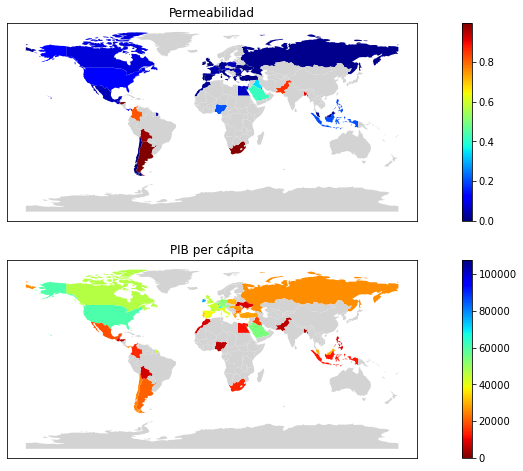

In [6]:
variables = ["permeability", "gdp_capita"]
cmap = "jet"

fig, *axs = plt.subplots(nrows=len(variables), figsize=(8*len(variables), 8))

for a, v  in zip(axs[0], variables):
    a.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

    norm = Normalize(0, world_only_used.get(v).max())
    world.plot(v, 
        cmap=cmap + ("_r" if v=='gdp_capita' else ''), 
        norm=norm, 
        legend=True, 
        ax=a, 
        missing_kwds={'color': 'lightgrey'})
        
    a.set_title(variables_to_labels[v])
fig.savefig("images/comparacion mundo.png", dpi=600)

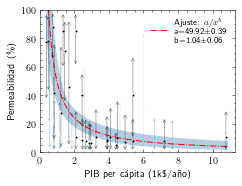

In [75]:
with plt.style.context('science'):

    fig, ax = plt.subplots()#figsize=(12,8))
    ax.tick_params(left=True,
                    bottom=True,
                    labelleft=True,
                    labelbottom=True)
        
    x = 'gdp_capita'
    # x = 'ppp_per_capita' 
    y = 'permeability'
    cmap = 'binary'
    cnorm = Normalize(0, 3)

    size = [0, 0.1, 0.5, 1]
    marker = [',','.', '+', 'o']
    linewidth = 0.5

    colores = ['#00B945', '#0C5DA5', '#000000']

    all_countries = get_all_countries()

    ___X = np.array(world_only_used[world_only_used["score"]==3].get(x)/10e3)
    _X = np.zeros(len(___X))
    _Y = np.zeros(len(___X))
    _S = np.zeros(len(___X))

    contador = 0

    for index, country in enumerate(all_countries):
        try:
            files = analysis.open_save_files(country, erase_prev=False, mode='r')
        except FileNotFoundError:
            continue

        v_array = []
        for l in files["permeability"]:
            v_array.append(float(l))
        v_array = np.array(v_array)
        v_array.sort()

        _5 = analysis.percentil(v_array, 5)
        _95 = analysis.percentil(v_array, 95)
        _median = analysis.percentil(v_array, 50)
        

        config = configuration.read_configuration(country, prefix='used/', sufix='_final')
        score = config["score"]
        X = float(world_only_used[world_only_used["name"]==country].get(x))/10e3
        Y = _median*100
        S = np.array((_5-_median, _95-_median))*100


        if score==3:
            _X[contador] = X
            _Y[contador] = Y
            _S[contador] = -S[0] + S[1]
            # print(country, X, Y, _S[contador])
            contador += 1


        arrstyle = ArrowStyle("->",
            widthA=0,
            widthB=score*0.1,
            head_length=score*0.1,
            head_width=score*0.05,
            angleB=0,
            angleA=0,
        ) 

        
        
        alpha= 0.2*score

        ax.annotate("", xy=(X, Y+S[0]), xytext=(X, Y), xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle=arrstyle, alpha=alpha, linewidth=linewidth, color=colores[score-1]))
        ax.annotate("", xy=(X, Y+S[1]), xytext=(X, Y), xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle=arrstyle, alpha=alpha, linewidth=linewidth, color=colores[score-1]))
        
        

        ax.scatter(X, Y, s=size[config["score"]], alpha=0.1+0.3*config["score"], marker=marker[config["score"]],  c=config["score"], cmap=cmap, norm=cnorm, zorder=2)
        # ax.errorbar(_X, _Y, yerr=_S, alpha=0.1+0.3*config["score"], capsize=1, fmt='none', ecolor='black', zorder=2, elinewidth=linewidth, capthick=linewidth)

        # ax.annotate(row["name"], (float(_X), float(_Y)))
        # if row['name'] in ["Saudi Arabia"]:#, "Luxembourg", "Spain", ]:
        #     ax.annotate(row["name"], (float(_X), float(_Y)))


    # fig_, ax_ = plt.subplots()
    # ax_.scatter(_X, _Y)        
    
    _X = _X[:-1]
    _Y = _Y[:-1]
                    

    # ax.set_title("Permeabilidad frente a PIB per cápita")
    # ax.set_title(f"{variables_to_labels[y]} frente a {variables_to_labels[x]}")
    ax.set_xlabel(f"{variables_to_labels[x]} {variables_to_units[x]}")
    ax.set_ylabel(f"{variables_to_labels[y]} {variables_to_units[y]}")
    ax.set_xlim(xmin=0)
    ax.set_ylim(ymin=0, ymax=100)
    # ax.set_ylim(ymin=0, ymax=0.4)
    # ax.grid(True)






    ## Solo estoy haciendo el ajuste con los que considero que han ajustado bien
    # _X = np.array(world_only_used[world_only_used["score"]==3].get(x)/10e3)
    # _Y = np.array(world_only_used[world_only_used["score"]==3].get(y)*100)
    # _S = np.array(world_only_used[world_only_used["score"]==3].get(y+'_err')*100, dtype='float64')



  

    C = 0

    def fit_curve(x, a, b):
        return (a / np.power(x, b)) + C

    N_DATA = 50

    SMOOTH = 250

    x_data = np.linspace(_X.min()*0.99, _X.max()*1.01, SMOOTH)
    y_data_min = np.zeros(SMOOTH)
    y_data_max = np.zeros(SMOOTH)

    _params = 2
    popts, pcovs = np.zeros((N_DATA,_params)), np.zeros((N_DATA,_params))
    popt = np.zeros(_params)
    pcov = np.zeros(_params)

    for iteration in range(N_DATA):
        indexes = np.random.choice(len(_X), int(len(_X)*0.70), replace=False)
        indexes.sort()
        __X = np.choose(indexes, _X)
        __Y = np.choose(indexes, _Y)
        __S = np.choose(indexes, _S)
        # popt, pcov = curve_fit(fit_curve, _X[[indexes]], _Y[[indexes]], sigma=_S[[indexes]], p0=(0.7,2))
        # popt, pcov = curve_fit(fit_curve, _X[indexes], _Y[indexes], sigma=_S[indexes], p0=(0.7,2))

        popt, pcov = curve_fit(fit_curve, __X, __Y, sigma=__S, p0=(50,1.1))#, bounds=(
        #     (10, 0),
        #     (200, 3)
        # ))
        popts[iteration,:] = popt[:]
        pcovs[iteration,:] = pcov.diagonal()
        
        y_data = fit_curve(x_data, *popt)
        
        if iteration == 0:
            y_data_min[:] = y_data[:]
            y_data_max[:] = y_data[:]
        else:
            for i in range(SMOOTH):
                y_data_min[i] = min(y_data_min[i], y_data[i])
                y_data_max[i] = max(y_data_max[i], y_data[i])


    for p in range(_params):
        b =  np.average(popts[:,p], weights=np.sqrt(pcovs[:,p]))
        popt[p] = b
        
        c = np.sum(np.sqrt(1/np.sum(1/np.sqrt(pcovs[:,p]))))
        pcov[p] = c

        # print(b,c)

    # print(popt)
    # print(pcov)

    y_data_all = fit_curve(x_data, *popt)

    # _text_ = f"Ajuste: $a/x^b$\na={float(popt[0]):.2f}$\pm${float(pcov[0]):.2f}\nb={float(popt[1]):.2f}$\\pm${float(pcov[1]):.2f}"
    _text_ = f"Ajuste: $a/x^b$\na={popt[0]:.2f}$\pm${pcov[0][0]:.2f}\nb={popt[1]:.2f}$\\pm${pcov[1][0]:.2f}"
    # print(_text_)
    ax.fill_between(x_data, y_data_min, y_data_max, alpha=0.3, zorder=0)
    ax.plot(x_data, y_data_all, '-.', color='red', label=_text_, zorder=1)

    ax.legend(fontsize='small')

    # ax.set_yscale('symlog')        
    
    fig.savefig("images/perme-pib.png", dpi=600)
    fig.savefig("images/perme-pib.pdf")

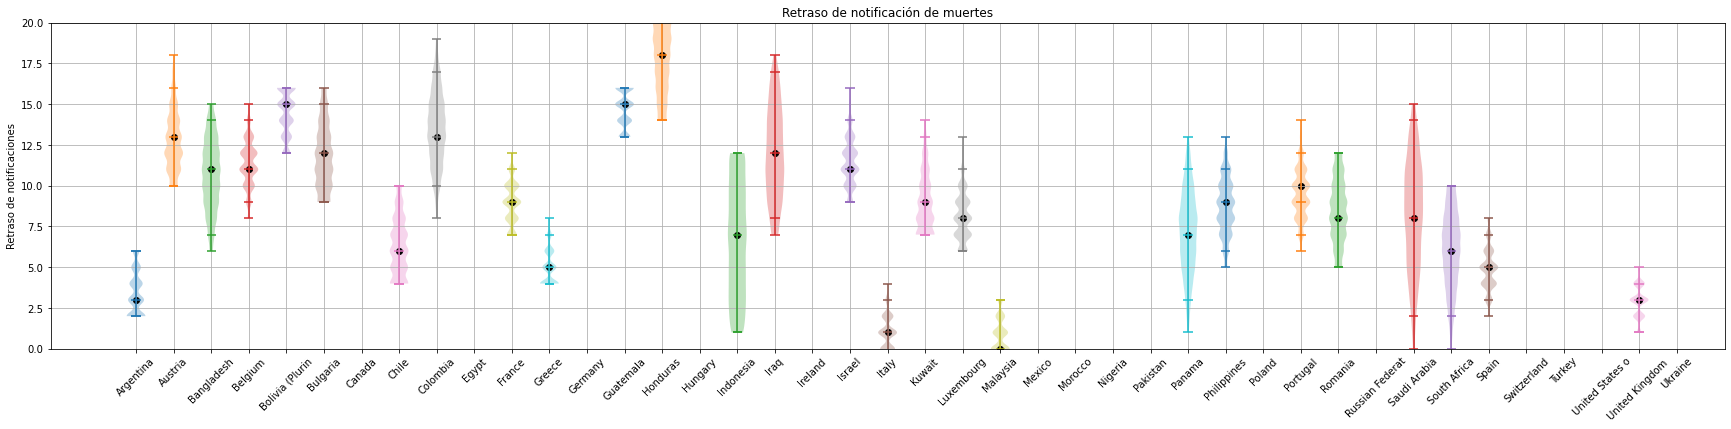

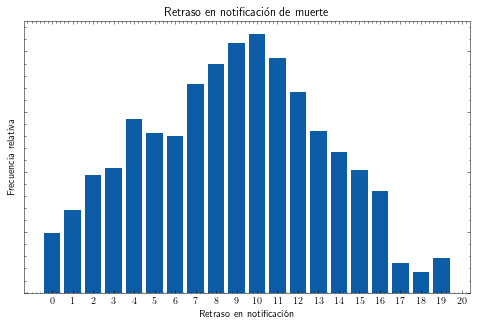

In [8]:
fig1, ax1= plt.subplots(figsize=(30,6))
values = []
values_5 = []
values_95 = []
errs = []
scores = []

bins = np.arange(21)
sum_histogram = np.zeros(20)

for i, c in enumerate(all_countries):
    score = world_only_used.loc[world_only_used["name"]==c]["score"]
    if float(score)!=3:
        continue

    try:
        files = analysis.open_save_files(c, erase_prev=False, mode='r')
    except FileNotFoundError:
        continue

    v_array = []
    for l in files["offset"]:
        v_array.append(float(l))
    v_array = np.array(v_array)
    v_array.sort()

    _5 = analysis.percentil(v_array, 5)
    _95 = analysis.percentil(v_array, 95)
    _median = analysis.percentil(v_array, 50)
    _err = v_array.std()
    


    histogram, bins_edges = np.histogram(v_array, bins=bins)
    sum_histogram += histogram * float(score)

    scores.append(score)
    values.append(_median)
    values_5.append(_5)
    values_95.append(_95)
    errs.append(_err*3/score)

    # ax1.boxplot(v_array, positions=[i], widths=score/3, notch=False)
    ax1.violinplot(v_array, positions=[i], showmedians=True, quantiles=[0.05, 0.95])
    ax1.scatter(i, _median, color='black')
    # ax1.scatter(i, _5, color='red')
    # ax1.scatter(i, _95, color='blue')

    # , usermedians=[_median], conf_intervals=[(_5, _95)]

values = np.array(values)
errs = np.array(errs)
scores = np.array(scores)
values_5 = np.array(values_5)
values_95 = np.array(values_95)

ax1.set_title("Retraso de notificación de muertes")
ax1.set_ylabel("Retraso de notificaciones")
ax1.set_xticks(range(len(all_countries)), [c if len(c)<15 else c[:15] for c in all_countries], rotation=45)
ax1.grid(True)
ax1.set_ylim(0, 20)
fig1.savefig("images/violin offset.png", dpi=600)


with plt.style.context('science'):
    fig2, ax2 = plt.subplots(figsize=(8,5))
    ax2.set_title("Retraso en notificación de muerte")
    ax2.set_xlabel("Retraso en notificación")
    ax2.set_ylabel("Frecuencia relativa")

    # ax2.grid(True)
    ax2.bar(bins_edges[:-1], sum_histogram, align='center')
    ax2.set_xticks(bins)
    # bins = int(max(values)) - int(min(values))
    # ax2.hist(values, bins=bins, weights=scores, alpha=0.3)
    # ax2.hist(values_5, bins=bins, weights=scores, alpha=0.3, color="orange")
    # ax2.hist(values_95, bins=bins, weights=scores, alpha=0.3, color="green")


    ax2.set_yticklabels([])
    # fig2.set_dpi(400)
    fig2.savefig("images/retraso notificacion.png", dpi=600)
    fig2.savefig("images/retraso notificacion.pdf")